# 5. 프로젝트(평가 루브릭 포함)

## 1. 들어가며

### 학습 목표
### 캐글의 타이타닉 데이터를 이용하여 데이터 전처리, 데이터 마이닝, 데이터 분석을 진행합니다.
### 이를 통해 우리가 배웠던 내용을 복습해봅시다.
### 캐글의 타이타닉 대회 (링크)

##2. 프로젝트 실습-데이터 확인 및 전처리

### 데이터 로딩
### 라이브러리 불러오기

In [31]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 데이터 불러오기

In [32]:
train_df = pd.read_csv('/aiffel/data/train.csv')
test_df = pd.read_csv('/aiffel/data/test.csv')
combine = [train_df, test_df]

In [33]:
train_df0 = train_df.copy()

### 데이터 확인

In [34]:
print('+++++++++++++++++++++++++++++++')
print('Train size:', train_df.shape)
print('Test size:', test_df.shape)
print('-------------------------------')
print('Train columns :', train_df.columns.values)
print('Test columns :', test_df.columns.values )
print('+++++++++++++++++++++++++++++++')

+++++++++++++++++++++++++++++++
Train size: (891, 12)
Test size: (418, 11)
-------------------------------
Train columns : ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
Test columns : ['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']
+++++++++++++++++++++++++++++++


In [35]:
train_df.head() 

# 정형 데이터 : 수치형, 범주형

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<!-- # Data Dictionary
# Variable	Definition	Key
# survival	Survival	0 = No, 1 = Yes
# pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  승객 클래스
# sex	Sex	
# Age	Age in years	
# sibsp	# of siblings / spouses aboard the Titanic	형제, 자매 / 배우자
# parch	# of parents / children aboard the Titanic	동승자, 자녀
# ticket	Ticket number	
# fare	Passenger fare	
# cabin	Cabin number	호실
# embarked	Port of Embarkation 승선지	C = Cherbourg, Q = Queenstown, S = Southampton

# Variable Notes
# pclass: A proxy for socio-economic status (SES)
# 1st = Upper
# 2nd = Middle
# 3rd = Lower

# age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

# sibsp: The dataset defines family relations in this way...
# Sibling = brother, sister, stepbrother, stepsister
# Spouse = husband, wife (mistresses and fiancés were ignored)

# parch: The dataset defines family relations in this way...
# Parent = mother, father
# Child = daughter, son, stepdaughter, stepson
# Some children travelled only with a nanny, therefore parch=0 for them. -->

In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 891이 안됨 데이터 전처리로 제거하거나 다른값으로 대체하는 과정이 필요

## 데이터 전처리
## 변수 제거

In [37]:
train_df = train_df.drop(['PassengerId','Name','Ticket', 'Fare', 'Cabin'], axis=1)
print(train_df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')


In [38]:
train_df.info()
train_df_temp = train_df.copy()
train_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4

## 결측치 채우기

In [39]:
train_df['Age'] = train_df['Age'].fillna(0)    # 결측치 다른값으로 채움
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
print('The most frequent value:',train_df['Embarked'].mode()[0])
train_df.info()

The most frequent value: S
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [40]:
train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,0.0,1,2,S
889,1,1,male,26.0,0,0,C
890,0,3,male,32.0,0,0,Q


## 변수 변환

In [41]:
train_df["Sex"] = train_df["Sex"].astype('category')
train_df["Sex"] = train_df["Sex"].cat.codes
# 성별 변경 : 여성은 0, 남성은 1로 
  
train_df["Embarked"] = train_df["Embarked"].astype('category')
train_df["Embarked"] = train_df["Embarked"].cat.codes
# 출발지 변경 : c = 0, q = 1, s = 2 
# C = Cherbourg, Q = Queenstown, S = Southampton
train_df.tail()  

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
886,0,2,1,27.0,0,0,2
887,1,1,0,19.0,0,0,2
888,0,3,0,0.0,1,2,2
889,1,1,1,26.0,0,0,0
890,0,3,1,32.0,0,0,1


## 3. 프로젝트 실습-EDA, 모델링, 성능평가
<!-- ### 데이터 탐색 및 시각화
### 데이터 통계량 탐색
### 아래 코드 블럭을 통해서 일반적인 통계치를 확인 가능합니다.
### mean, std, min, 25%, 50%, 75%, max 값등을 확인 가능합니다.
### 25%, 50%, 75%을 통해서 IQR 도 계산이 가능합니다. -->

In [42]:
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,23.799293,0.523008,0.381594,1.536476
std,0.486592,0.836071,0.477990,17.596074,1.102743,0.806057,0.791503
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,2.000000


## Label과의 연관성

In [43]:
for i in range(1,train_df.shape[1]):
    print(train_df[[train_df.columns[i], "Survived"]].groupby([train_df.columns[i]], as_index=False).
          mean().sort_values(by='Survived', ascending=False))
    print('===================================')

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
   Sex  Survived
0    0  0.742038
1    1  0.188908
      Age  Survived
88  80.00       1.0
80  63.00       1.0
17  12.00       1.0
1    0.42       1.0
10   5.00       1.0
..    ...       ...
47  34.50       0.0
62  46.00       0.0
61  45.50       0.0
50  36.50       0.0
31  23.50       0.0

[89 rows x 2 columns]
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
   Embarked  Survived
0         0  0.553571
1         1  0.389610
2         2  0.339009


<!-- # 승객석 클래스가 높을수록 생존이 높다
# 여성의 생존이 앞도적으로 높다
# Cherbourg 승선지의 차이 생존이 높다 -->

### 각 변수들의 분포도

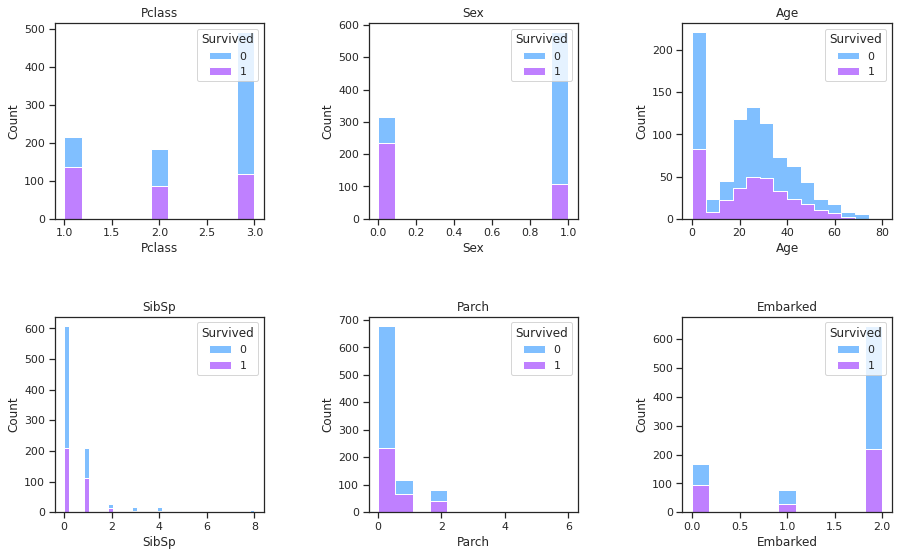

In [44]:
col_name = train_df.columns[1:]

fig, axs = plt.subplots(2,3, figsize=(15, 9), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()

for i in range(col_name.shape[0]):
    sns.histplot(data=train_df,x=train_df[col_name[i]],hue='Survived',palette='cool',
                 multiple="stack",ax=axs[i], element="step")
    axs[i].set_title(col_name[i])
    # 0은 사망자, 1은 생존자

<Figure size 648x648 with 0 Axes>

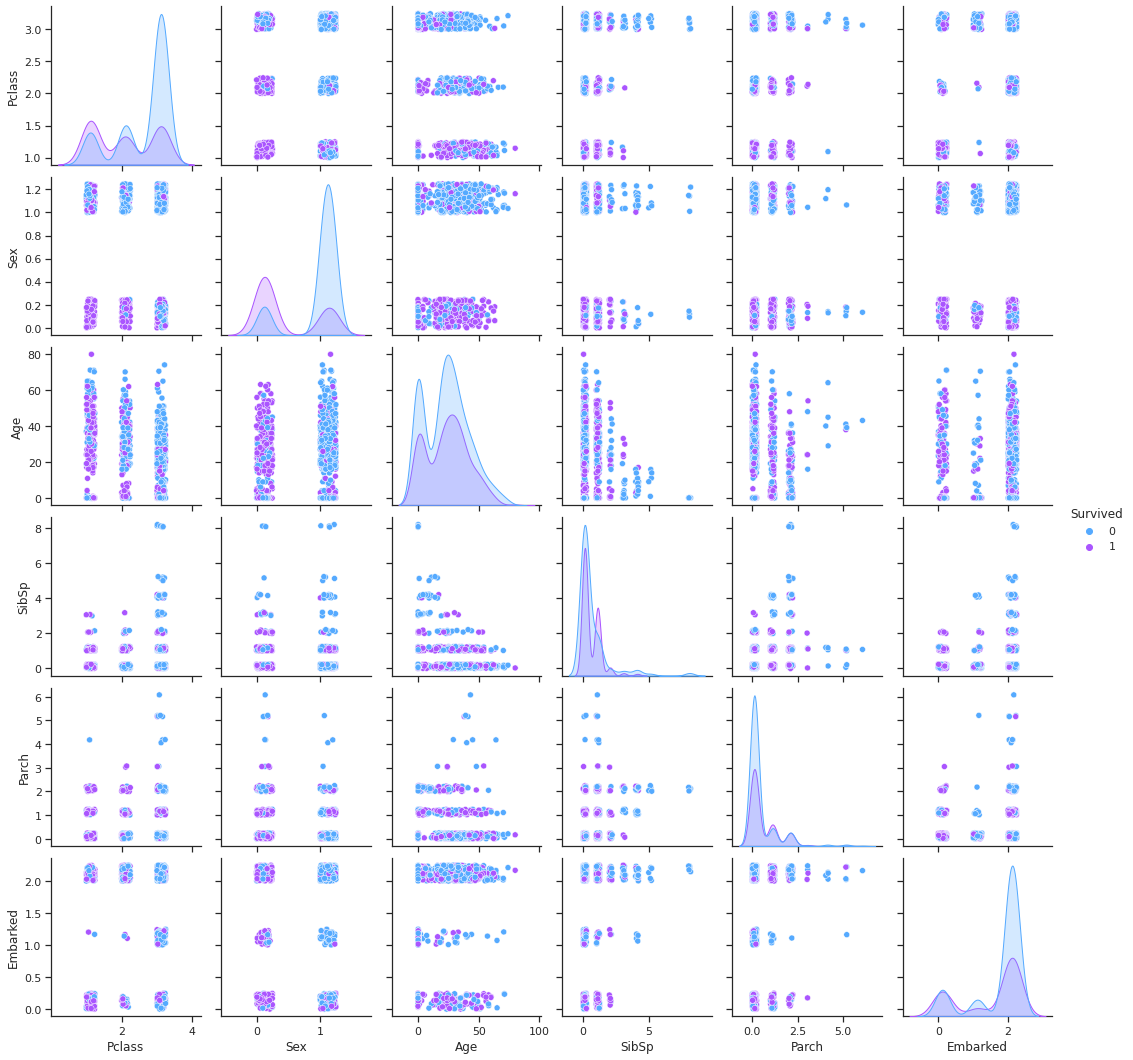

In [45]:
train_df_rand = train_df.copy()

plt.figure(figsize=(9,9))
rand = pd.DataFrame(np.random.randint(0,100,size=train_df.iloc[:,1:].shape), 
                  columns=train_df.iloc[:,1:].columns)/400
train_df_rand.iloc[:,1:]=train_df.iloc[:,1:]+rand  # 랜덤값을 사용
sns.set(style="ticks")
sns.pairplot(train_df_rand,hue='Survived',palette='cool')

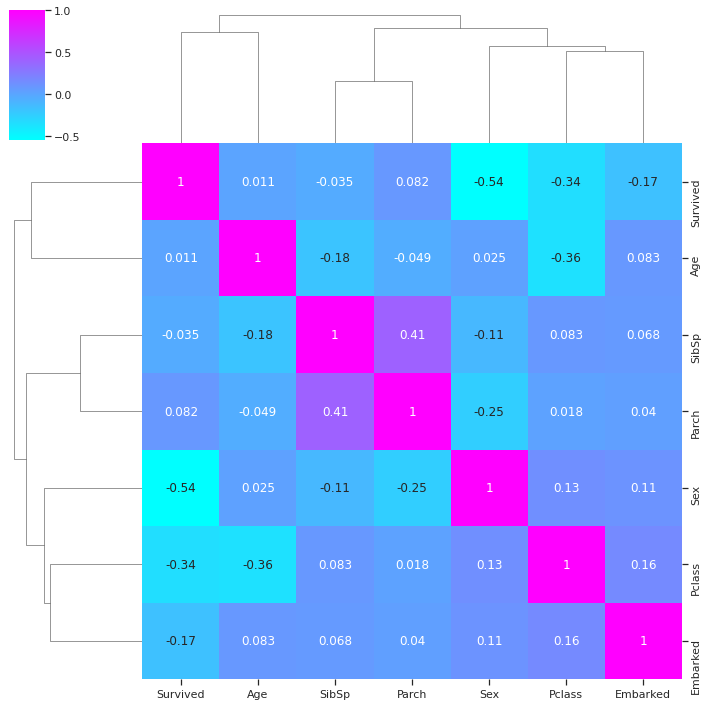

In [46]:
corr = train_df.corr()
sns.clustermap(corr,annot = True,cmap = 'cool')

<!-- # 대각선은 자기 자신과의 상관 관계
 생존율이 1 인 경우 여성의 생존율이 크기 때문에 짙은 파랑색을 띈다 -->

## 모델링
## train/test 데이터 준비

In [47]:
X_train = train_df.drop(['Survived'], axis=1)
y_train = train_df['Survived']
print(X_train.shape,y_train.shape)

(891, 6) (891,)


## test 데이터 처리

In [48]:
test_df = test_df.drop(['PassengerId','Name','Ticket', 'Fare', 'Cabin'], axis=1)

# 결측치를 대체하거나 변환하는 과정
test_df['Age'] = test_df['Age'].fillna(0)
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])
print('The most frequent value:',test_df['Embarked'].mode()[0])
test_df["Sex"] = test_df["Sex"].astype('category')
test_df["Sex"] = test_df["Sex"].cat.codes

test_df["Embarked"] = test_df["Embarked"].astype('category')
test_df["Embarked"] = test_df["Embarked"].cat.codes

test_df.info()
X_test = test_df.copy()
print(X_test.shape)

The most frequent value: S
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int8   
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Embarked  418 non-null    int8   
dtypes: float64(1), int64(3), int8(2)
memory usage: 14.0 KB
(418, 6)


## Cross validation + Model evaluation

In [51]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.ticker as ticker
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [52]:
def kfold(X_train,y_train,clf):
    clf_score = []
    kf = KFold(n_splits = 5, shuffle = True, random_state = 50)
    global X_tra, X_val, y_tra, y_val, y_pred
    for tra_index, val_index in kf.split(X_train):
        X_tra, X_val = X_train.iloc[tra_index,:], X_train.iloc[val_index,:]
        y_tra, y_val = y_train.iloc[tra_index], y_train.iloc[val_index]
        
        clf.fit(X_tra, y_tra) 
        
        y_pred = clf.predict(X_val) 
        clf_score.append(clf.score(X_tra,y_tra))
    print("Score:", np.mean(clf_score))

In [53]:
models = [
    SVC(gamma='auto'), 
    KNeighborsClassifier(n_neighbors = 3),
    SGDClassifier(max_iter=100, tol=1e-3),
    SGDClassifier(),
    LogisticRegression(solver='lbfgs'), 
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(n_estimators=100)
]


for clf in models:
    print('===================================')
    print("model:",clf)
    kfold(X_train,y_train,clf) 


y_predict = clf.predict(X_test)

model: SVC(gamma='auto')
Score: 0.8754203633956852
model: KNeighborsClassifier(n_neighbors=3)
Score: 0.8678455489544101
model: SGDClassifier(max_iter=100)
Score: 0.7232921505901635
model:

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have v

 SGDClassifier()
Score: 0.6792966103030398
model: LogisticRegression()
Score: 0.7946152512725153
model: DecisionTreeClassifier(max_depth=10)
Score: 0.9200332508627891
model: RandomForestClassifier()


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


Score: 0.9424815229210332


# ROC-AUC 확인하기 : 분리모델 평가

AUC: 0.7571428571428572


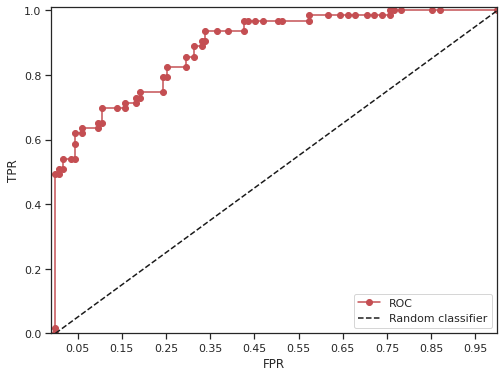

In [54]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_tra,y_tra)
pred_proba_class1 = clf.predict_proba(X_val)[:,1]

plt.figure(figsize=(8,6))

def roc_curve_plot(y_pred, y_val):
    fprs, tprs, thresholds = roc_curve(y_pred, pred_proba_class1)
    plt.plot(fprs, tprs, 'ro-',label='ROC')
    plt.plot([0,1],[0,1], 'k--', label='Random classifier')
    
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(-0.01, 1); plt.ylim(0, 1.01)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    
roc_curve_plot(y_pred, y_val)    

print("AUC:",roc_auc_score(y_pred,y_val))

# 좌측 상단을 향하고 있다.

# ROC (이진분류모델 예측성능) : FPR이 변할때 TPR이 어떻게 변하는지 표시. 곡선이 좌측 위로 갈수록 성능이 좋다
# AUC : 1에 가까울수록 성능이 좋다.